# Data Analysis Exercise 2
Group 11:
*   Antonello Avella
*   Eugenio Carpentieri
*   Valerio Costantino
*   Claudio De Pisapia


In [1]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# set a seed for random generator
#np.random.seed(5)

## Dataset loading 

In [95]:
data_train = scipy.io.loadmat('/content/gdrive/MyDrive/2023/Data Analysis/finalProject_DA/Gruppo11-Prova/train_8feb23.mat')['train']
data_test = scipy.io.loadmat('/content/gdrive/MyDrive/2023/Data Analysis/finalProject_DA/Gruppo11-Prova/test_8feb23.mat')['test']


print('Train data shape: ', data_train.shape)
print('Test data shape: ', data_test.shape)


#np.random.shuffle(data_train)

X_train = data_train[:,:-1]
Y_train = data_train[:,-1]

data_test = data_test[data_test[:, -1].argsort()]  # sort by time

X_test = data_test[:,:-1]
Time_test = data_test[:,-1]


Train data shape:  (24000, 21)
Test data shape:  (80, 21)


In [ ]:
Time_test

array([  300.,   600.,   900.,  1200.,  1500.,  1800.,  2100.,  2400.,
        2700.,  3000.,  3300.,  3600.,  3900.,  4200.,  4500.,  4800.,
        5100.,  5400.,  5700.,  6000.,  6300.,  6600.,  6900.,  7200.,
        7500.,  7800.,  8100.,  8400.,  8700.,  9000.,  9300.,  9600.,
        9900., 10200., 10500., 10800., 11100., 11400., 11700., 12000.,
       12300., 12600., 12900., 13200., 13500., 13800., 14100., 14400.,
       14700., 15000., 15300., 15600., 15900., 16200., 16500., 16800.,
       17100., 17400., 17700., 18000., 18300., 18600., 18900., 19200.,
       19500., 19800., 20100., 20400., 20700., 21000., 21300., 21600.,
       21900., 22200., 22500., 22800., 23100., 23400., 23700., 24000.])

# Scatter and Correlation matrix

In [ ]:
# ORIGINAL DATA VISUALIZATION
# Visualizing data in a 2- or 3-dimensional plot gives loads of information
# about data distribution and correlations, however it is not suitable for high
# dimensional data, as in our application. 
# For example, we can explore data by observing the relationship existing 
# between couples of features. From this activity we can detect that some of the
# features are heavily correlated. However, we cannot understand the "big picture"

df = pd.DataFrame(X_train)

sns.pairplot(df, palette='viridis')

Output hidden; open in https://colab.research.google.com to view.

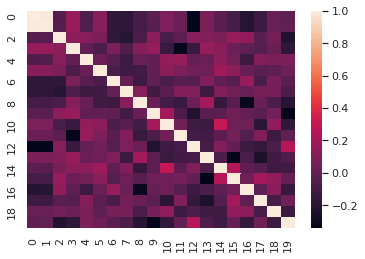

In [ ]:
sns.heatmap(df.corr())

# PCA Sklearn

Variance with scaled data
    Eigenvalues  Explained variance
0      2.482751            0.124132
1      1.939623            0.096977
2      1.866575            0.093325
3      1.508626            0.075428
4      1.454699            0.072732
5      1.337340            0.066864
6      1.270851            0.063540
7      1.120305            0.056013
8      1.100607            0.055028
9      0.969279            0.048462
10     0.887861            0.044391
11     0.786476            0.039322
12     0.664406            0.033219
13     0.584611            0.029229
14     0.542516            0.027125
15     0.451303            0.022564
16     0.392624            0.019630
17     0.335457            0.016772
18     0.295678            0.014783
19     0.009245            0.000462


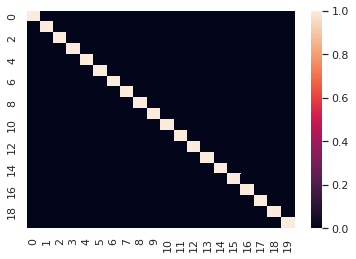

In [71]:
# Scaling
scaler = StandardScaler()
X_scale = scaler.fit_transform(X_train)

# PCA computation
pca_scale = PCA()
pca_scale.fit(X_scale)
X_pca_scale = pca_scale.transform(X_scale)

# Principal directions and the variance
print('Variance with scaled data')
pc_dirs = pca_scale.components_
pc_var = pca_scale.explained_variance_
var_pca_scale = pd.DataFrame(np.stack((pca_scale.explained_variance_, pca_scale.explained_variance_ratio_), axis=1), columns=['Eigenvalues', 'Explained variance'])
print(var_pca_scale)

# Correlation matrix after PCA
dft = pd.DataFrame(X_pca_scale)
sns.heatmap(dft.corr())

## Plotting Cumulative and Explained variance

    Proportion of variance explained  cumulative
1                           0.124132    0.124132
2                           0.096977    0.221109
3                           0.093325    0.314434
4                           0.075428    0.389862
5                           0.072732    0.462594
6                           0.066864    0.529459
7                           0.063540    0.592999
8                           0.056013    0.649011
9                           0.055028    0.704039
10                          0.048462    0.752501
11                          0.044391    0.796893
12                          0.039322    0.836215
13                          0.033219    0.869434
14                          0.029229    0.898663
15                          0.027125    0.925788
16                          0.022564    0.948352
17                          0.019630    0.967982
18                          0.016772    0.984754
19                          0.014783    0.999538
20                  

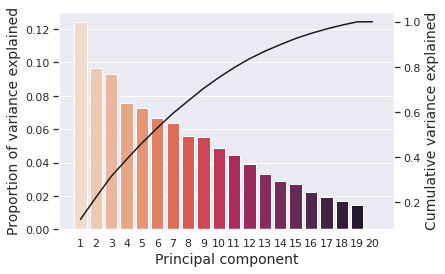

In [72]:
idx = np.arange(20) + 1
df_explained_variance_scale = pd.DataFrame([pca_scale.explained_variance_ratio_, np.cumsum(pca_scale.explained_variance_ratio_)], 
                                     index=['Proportion of variance explained', 'cumulative'], 
                                     columns=idx).T

print(df_explained_variance_scale)


fig, ax1 = plt.subplots()
ax1.set_xlabel('Principal component', fontsize=14)
ax1.set_ylabel('Proportion of variance explained', fontsize=14)
ax2 = sns.barplot(x=idx, y='Proportion of variance explained', data=df_explained_variance_scale, palette='rocket_r')
ax2 = ax1.twinx()
ax2.grid(False)
ax2.set_ylabel('Cumulative variance explained', fontsize=14)
ax2 = sns.lineplot(x=idx-1, y='cumulative', data=df_explained_variance_scale, color='k')

## Dimensionality reduction

In [73]:
# the plot shows that 17 principal components allow to preserve more than
# 95% of the total data set variance! So, we re-apply PCA setting the 
# number of components to 17
m = 17
pca2 = PCA(n_components=m)
pca2.fit(X_scale)
X_train_pca = pca2.transform(X_train)
X_test_pca = pca2.transform(X_test)

print("Train Set")
print("\toriginal shape:   ", X_train.shape)
print("\ttransformed shape:", X_train_pca.shape)

print("\nTest Set")
print("\toriginal shape:   ", X_test.shape)
print("\ttransformed shape:", X_test_pca.shape)

Train Set
	original shape:    (24000, 20)
	transformed shape: (24000, 17)

Test Set
	original shape:    (80, 20)
	transformed shape: (80, 17)


# SkLearn Logistic Regression (not used)

In [ ]:
from sklearn.linear_model import SGDClassifier

# use only to obtain quickly the solution 
def my_lr_classification(XX_train, XX_test, YY_train):
    lr = SGDClassifier('log') 
    lr.fit(XX_train, YY_train)
    YY_estimated = lr.predict(XX_test) 

    return YY_estimated;

# Logistic Regression model

In [133]:
def sigmoid(z):
    sig = 1 / (1 + np.exp(-z))
    return sig

def loss(x, y, beta):
  return np.log(1 / sigmoid(np.dot(x.T, beta).sum() * y))

def predict(x, beta):
    sum = np.dot(x.T, beta).sum()
    if sum > 0:
        return 1
    return -1

def calc_loss_and_acc(x, y, beta):
    temp_loss=[]
    temp_acc=[]
    for x_i, y_i in zip(x, y):
        temp_loss = np.append(temp_loss, loss(x_i, y_i, beta))
        temp_acc = np.append(temp_acc, predict(x_i, beta)==y_i)
    return np.mean(temp_loss), np.mean(temp_acc)

def sgd(x_train, y_train, lr=0.1, epochs=1,):
    beta_total = np.random.normal(size = x_train.shape[1])

    temp_loss, temp_acc = calc_loss_and_acc(x_train, y_train, beta_total)
    epochs_train_loss = [temp_loss]
    epochs_train_acc = [temp_acc]

    for i in range(epochs):
        beta_approx = []
        for x_i, y_i in zip(x_train, y_train):
            grad = -(x_i.T * y_i) / (np.exp(np.dot(x_i.T, beta_total) * y_i) + 1)
            beta_total -= lr * grad
            beta_approx.append(beta_total)
        
        temp_loss, temp_acc = calc_loss_and_acc(x_train, y_train, beta_total)
        epochs_train_loss.append(temp_loss)
        epochs_train_acc.append(temp_acc)

        print("Epoch ", i+1, " ->  Train loss: ", np.round(epochs_train_loss[-1], 3), "  Train acc: ", np.round(epochs_train_acc[-1], 4))
   
    return beta_approx, epochs_train_loss, epochs_train_acc

### Training phase

In [132]:
num_epochs = 1
lr = 1

beta, epochs_train_loss, epochs_train_acc = sgd(X_train, Y_train, lr, num_epochs)

[  7.69968463   8.42526179 -10.05247494 -14.37479599  -4.33431028
   8.27474299   3.45303557  -3.40038114  -9.35775095 -17.13856305
 -19.32011494  13.93798009 -22.12418782  -1.03679208  -9.23041586
  -4.88400963  -7.55902095  23.97747117  -4.74738658   1.72596027]
[-12.06932205 -11.60885741  14.16523163  19.74106689   5.83955729
 -10.59190526  -6.54808852   5.95844143  14.4019408   26.71318024
  28.41568496 -22.56671116  31.30838859  -0.61659962  12.57166226
   6.03177908  13.23087794 -35.0119716    6.55461929  -4.20657085]
[-12.35724123 -10.09117283  12.71493662  17.07660806   4.90678193
  -8.17274919  -7.97957443   6.8062883   14.44627631  27.18008925
  26.99461285 -23.91239452  28.26852707  -3.14921388  10.74080162
   4.35169662  15.09878373 -32.95736468   5.71478506  -5.99292909]
[  8.13338401   7.35629519  -9.08067404 -12.48776268  -3.65636179
   6.44281644   4.74438952  -4.19888494  -9.62747964 -17.95741212
 -18.60307705  15.41745267 -20.11343666   1.07043565  -7.91768655
  -3.59

<ipython-input-131-c21e2fde4dcb>:33: RuntimeWarning: overflow encountered in exp
  grad = -(x_i.T * y_i) / (np.exp(np.dot(x_i.T, beta_total) * y_i) + 1)


Streaming output truncated to the last 5000 lines.
[ 10.28502114   9.3089199   -7.47389025 -10.1474       5.95789653
 -14.69625583  14.27442077  -4.03394597 -20.66289971  -9.65876314
   3.65252528   8.83105201  -2.67325068 -15.11535576 -18.98960762
 -19.23370829  -1.53916104 -18.67124374   3.04117267  23.5216531 ]
[ -8.14607783  -5.37243519   8.60068114   7.15460305  -4.99348044
  11.17419118  -8.07300782   2.86506357  16.21902325   5.0990643
  -3.46200256  -7.70520999   1.02734117   8.32567551  13.4113839
  15.9527632    2.34970291  12.94298769  -2.02921223 -16.91152094]
[ -8.56241845  -8.07604629   5.78488174   8.5917598   -4.91524289
  12.31078147 -12.4108494    3.412123    17.22606213   8.45706355
  -2.94797135  -7.23606563   2.4032668   13.17835271  16.07476154
  15.89506263   1.09698951  15.84498371  -2.59370512 -19.86232851]
[  9.93839824   9.10720874  -7.07188469  -9.85482725   5.74172798
 -14.22704425  13.97436169  -3.91647014 -19.97473739  -9.47608329
   3.49756452   8.493635

<ipython-input-131-c21e2fde4dcb>:2: RuntimeWarning: overflow encountered in exp
  sig = 1 / (1 + np.exp(-z))
<ipython-input-131-c21e2fde4dcb>:6: RuntimeWarning: divide by zero encountered in double_scalars
  return np.log(1 / sigmoid(np.dot(x.T, beta).sum() * y))


Epoch  1  ->  Train loss:  inf   Train acc:  0.9617


In [128]:
beta[1]

array([108.45835536, 114.00235418,  -4.55651689,  19.43680157,
       -19.3482868 ,  32.08390285,  -5.64429653, -13.84933336,
       -21.87443641, -15.61751178,   6.44069172, -10.29308006,
        10.61232474,   0.81575205, -14.8894035 ,  14.53170642,
       -17.27756405,  25.32032588,   1.85186847,  12.62488607])

In [129]:
beta_plot = []
for i in beta:
  beta_plot.append(i[0])

## Plotting Loss and Accuracy

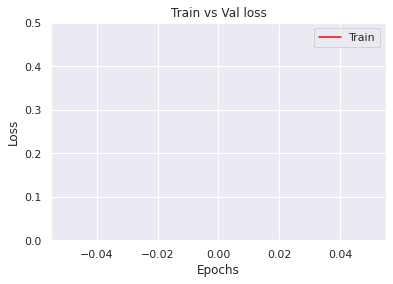

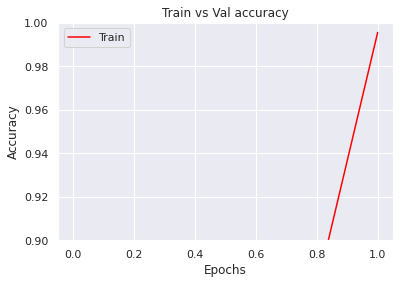

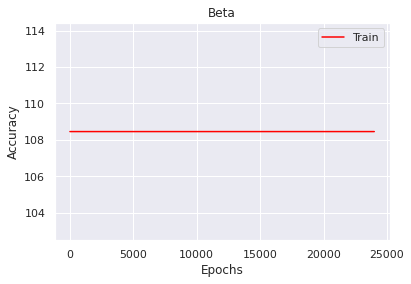

In [130]:
# Loss plot
plt.title("Train vs Val loss")
plt.plot(np.arange(0,num_epochs+1), epochs_train_loss, color="red")
plt.legend(["Train"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim(top=0.5, bottom=0)
plt.show()

# Accuracy plot
plt.title("Train vs Val accuracy")
plt.plot(np.arange(0,num_epochs+1), epochs_train_acc, color="red")
plt.legend(["Train"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim(top=1, bottom=0.9)
plt.show()

# beta plot
plt.title("Beta")
plt.plot(range(0,len(beta_plot)), beta_plot, color="red")
plt.legend(["Train"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

# Predict on Test Set

In [ ]:
y_pred=[]

for x, i in  zip(X_test_pca, Time_test):
    y_pred.append(predict(x, beta[int(i-1)]))

print(y_pred)

[-1, 1, -1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1]


## String decode

In [ ]:
#y_pred = my_lr_classification(X_train_pca, X_test_pca, Y_train)

bits = ""
for bit in y_pred:
  if(bit == -1):
    bits += "0"
  else:
    bits += "1"

def BinaryToDecimal(binary):
    binary1 = binary
    decimal, i, n = 0, 0, 0
    while(binary != 0):
        dec = binary % 10
        decimal = decimal + dec * pow(2, i)
        binary = binary//10
        i += 1
    return (decimal) 

str_data=""  

for i in range(0, len(bits), 8):
    temp_data = int(bits[i : i + 8])
    decimal_data = BinaryToDecimal(temp_data)
    str_data = str_data + chr(decimal_data)
  
# printing the result
print("String converted:", str_data)


String converted: WntrComing
